In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import RobustScaler, LabelEncoder
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
data=pd.read_csv("synthetic_weather_data_wo_label_30anomalyinjected.csv",header=0, index_col=0, parse_dates=True)

In [3]:
data_labeled=pd.read_csv("synthetic_weather_data_wi_label_supervised_30anomalyinjected.csv", header=0, index_col=0, parse_dates=True)

In [4]:
data.head()

,temperature,pressure,humidity
date,,,
2008-01-01,-0.09,987.23,51.10
2008-01-02,-0.96,987.06,51.17
2008-01-03,-0.65,987.82,51.13
2008-01-04,-0.68,986.95,50.94
2008-01-05,-0.42,988.15,51.30


### 1 year test data with 30 anomalies and two block anomalies are present.

Text(0.5, 1.0, 'Train_test split plot')

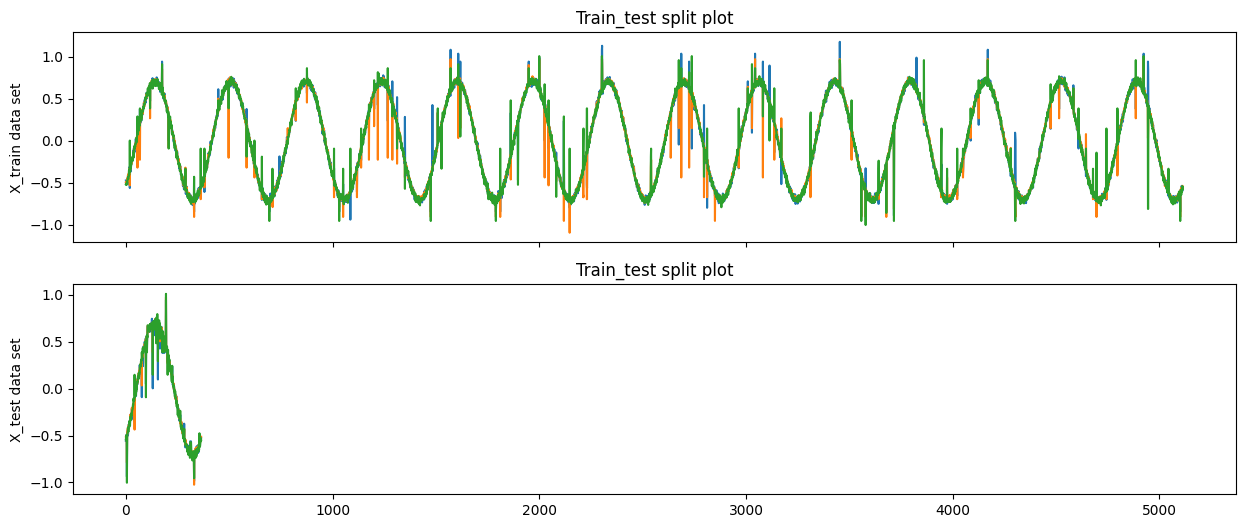

In [5]:
nest_samples = 365  # 1 year
train = data.iloc[:-nest_samples].copy()
test = data.iloc[-nest_samples:].copy()

rc= RobustScaler()
le = LabelEncoder()

X_train= rc.fit_transform(train)
X_test=rc.transform(test)

y = data_labeled.iloc[:, -1].values
y_train = y[:-nest_samples].copy()
y_test = y[-nest_samples:].copy()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

fig, axes = plt.subplots(2, 1, figsize=(15,6), sharex=True)

plt.sca(axes[0])
plt.plot(X_train)
plt.ylabel('X_train data set')
plt.title('Train_test split plot')
    
plt.sca(axes[1])
plt.plot(X_test)
plt.ylabel('X_test data set')
plt.title('Train_test split plot')

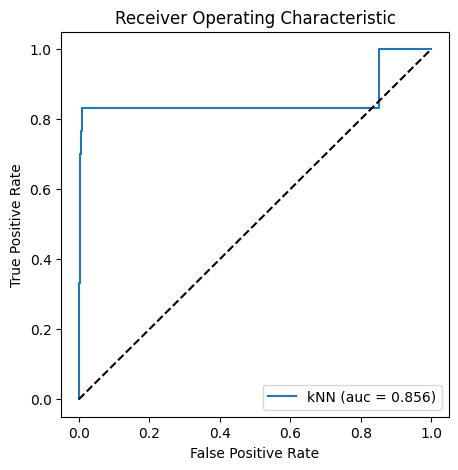


On Training Data:
KNN ROC:0.9931, precision @ rank n:0.9597

On Test Data:
KNN ROC:0.8561, precision @ rank n:0.8333

Outlier prediction information on Test Data: 365 {0: 314, 1: 51}
No of Errors in test set: 31

RMS on Test Set : 0.2914301062850492

MAE on Test Set : 0.08493150684931507


array([[309,  26],
       [  5,  25]], dtype=int64)

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pyod
from pyod.models.knn import KNN
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
from sklearn.metrics import roc_auc_score,roc_curve,auc

classifier_name = 'KNN'
# model_knn = KNN()  # with default parameters.
model_knn = KNN()

# Prediction on training data
model_knn.fit(X_train, y=None)  # y is ignored in unsupervised setting.
train_prediction = model_knn.labels_  # binary labels (0: inliers, 1: outliers)
train_prediction_scores = model_knn.decision_scores_  # raw outlier scores. The higher, the more abnormal.

# Prediction on test data
test_prediction = model_knn.predict(X_test) # binary labels (0: inliers, 1: outliers)
#test_prediction_scores = model_knn.decision_function(X_test)
test_prediction_scores = model_knn.predict_proba(X_test)[:,1]
# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, test_prediction_scores)
fpr, tpr, thresholds = roc_curve(y_test, test_prediction_scores)
auc_kNN = auc(fpr,tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', label='kNN (auc = %0.3f)' % auc_kNN)

#plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], 'k--')  # Random ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print statement
print("\nOn Training Data:")
evaluate_print(classifier_name, y_train, train_prediction_scores)
print("\nOn Test Data:")
evaluate_print(classifier_name, y_test, test_prediction_scores)
unique, counts = np.unique(test_prediction, return_counts=True)
print("\nOutlier prediction information on Test Data:", len(X_test), dict(zip(unique, counts)))
# no of errors in test set
number_of_errors = (test_prediction != y_test).sum()
print('No of Errors in test set: {}'.format(number_of_errors))
rms = mean_squared_error(y_test, test_prediction, squared=False)
mae = mean_absolute_error(y_test, test_prediction)
print('\nRMS on Test Set :',rms)
print('\nMAE on Test Set :',mae)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model_knn.predict(X_test))

In [7]:
thresholds

array([1.33142293, 0.33142293, 0.08299468, 0.07487109, 0.06428239,
       0.06311032, 0.04789052, 0.04669956, 0.04155423, 0.03878602,
       0.03273535, 0.00563451, 0.00560892, 0.00162837])

### 3 year of test data 

Text(0.5, 1.0, 'Train_test split plot')

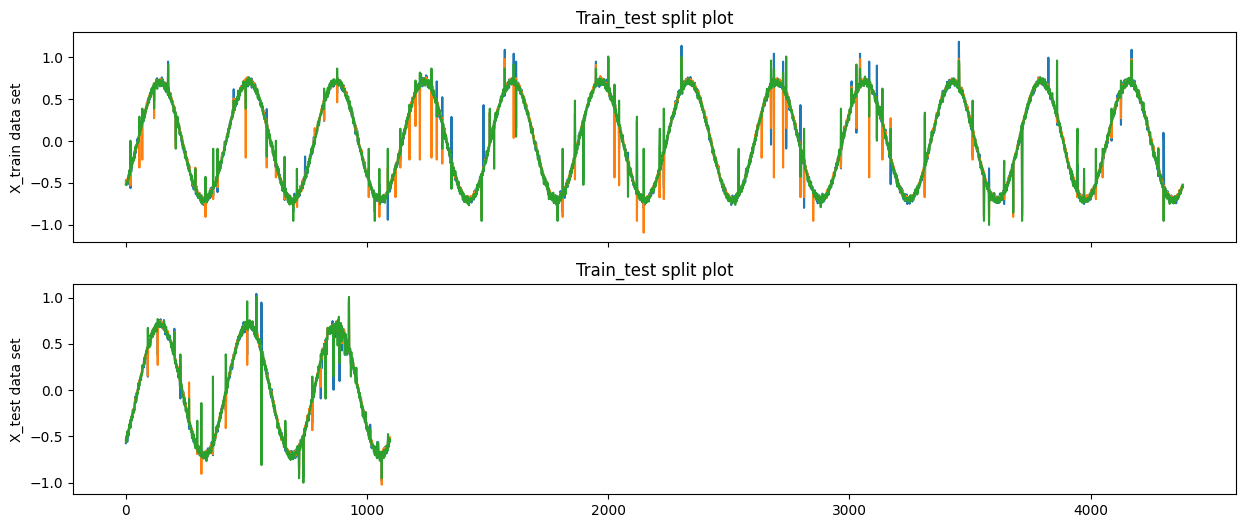

In [8]:
nest_samples = 1096  # 3 year
train = data.iloc[:-nest_samples].copy()
test = data.iloc[-nest_samples:].copy()

rc= RobustScaler()
le = LabelEncoder()

X_train= rc.fit_transform(train)
X_test=rc.transform(test)

y = data_labeled.iloc[:, -1].values
y_train = y[:-nest_samples].copy()
y_test = y[-nest_samples:].copy()

y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

fig, axes = plt.subplots(2, 1, figsize=(15,6), sharex=True)

plt.sca(axes[0])
plt.plot(X_train)
plt.ylabel('X_train data set')
plt.title('Train_test split plot')
    
plt.sca(axes[1])
plt.plot(X_test)
plt.ylabel('X_test data set')
plt.title('Train_test split plot')

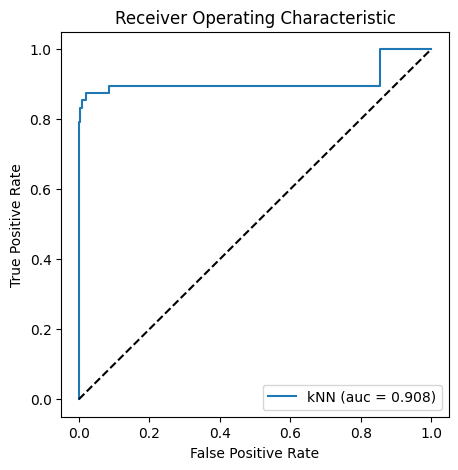


On Training Data:
KNN ROC:0.9916, precision @ rank n:0.9717

On Test Data:
KNN ROC:0.9081, precision @ rank n:0.8333

Outlier prediction information on Test Data: 1096 {0: 982, 1: 114}
No of Errors in test set: 78

RMS on Test Set : 0.2667730931178758

MAE on Test Set : 0.07116788321167883


array([[976,  72],
       [  6,  42]], dtype=int64)

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pyod
from pyod.models.knn import KNN
from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize
from sklearn.metrics import roc_auc_score,roc_curve,auc

classifier_name = 'KNN'
# model_knn = KNN()  # with default parameters.
model_knn = KNN()

# Prediction on training data
model_knn.fit(X_train, y=None)  # y is ignored in unsupervised setting.
train_prediction = model_knn.labels_  # binary labels (0: inliers, 1: outliers)
train_prediction_scores = model_knn.decision_scores_  # raw outlier scores. The higher, the more abnormal.

# Prediction on test data
test_prediction = model_knn.predict(X_test) # binary labels (0: inliers, 1: outliers)
#test_prediction_scores = model_knn.decision_function(X_test)
test_prediction_scores = model_knn.predict_proba(X_test)[:,1]

# Calculate AUC-ROC score
auc_roc = roc_auc_score(y_test, test_prediction_scores)
fpr, tpr, thresholds = roc_curve(y_test, test_prediction_scores)
auc_kNN = auc(fpr,tpr)

plt.figure(figsize=(5,5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', label='kNN (auc = %0.3f)' % auc_kNN)

#plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_roc))
plt.plot([0, 1], [0, 1], 'k--')  # Random ROC curve
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print statement
print("\nOn Training Data:")
evaluate_print(classifier_name, y_train, train_prediction_scores)
print("\nOn Test Data:")
evaluate_print(classifier_name, y_test, test_prediction_scores)
unique, counts = np.unique(test_prediction, return_counts=True)
print("\nOutlier prediction information on Test Data:", len(X_test), dict(zip(unique, counts)))
# no of errors in test set
number_of_errors = (test_prediction != y_test).sum()
print('No of Errors in test set: {}'.format(number_of_errors))
rms = mean_squared_error(y_test, test_prediction, squared=False)
mae = mean_absolute_error(y_test, test_prediction)
print('\nRMS on Test Set :',rms)
print('\nMAE on Test Set :',mae)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model_knn.predict(X_test))

In [25]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 1.07920325e-01, 9.39453933e-02,
       8.05342340e-02, 7.90654248e-02, 5.93842012e-02, 5.84411217e-02,
       5.21882894e-02, 4.72240189e-02, 4.64999130e-02, 4.15711491e-02,
       4.11031474e-02, 3.43786726e-02, 3.43068238e-02, 2.51930035e-02,
       2.50177150e-02, 9.83806015e-03, 9.82325172e-03, 8.03192317e-03,
       8.01110675e-03, 1.59708688e-03])

### Visualization

In [12]:
from pyod.utils.example import visualize

In [13]:
new_result = []
for gd, p in zip(y_test, test_prediction):
    if gd==1 and p == 0:
        new_result.append(1)
    else:
        new_result.append(0)
new_result = np.array(new_result)

In [14]:
new_result.sum()

6

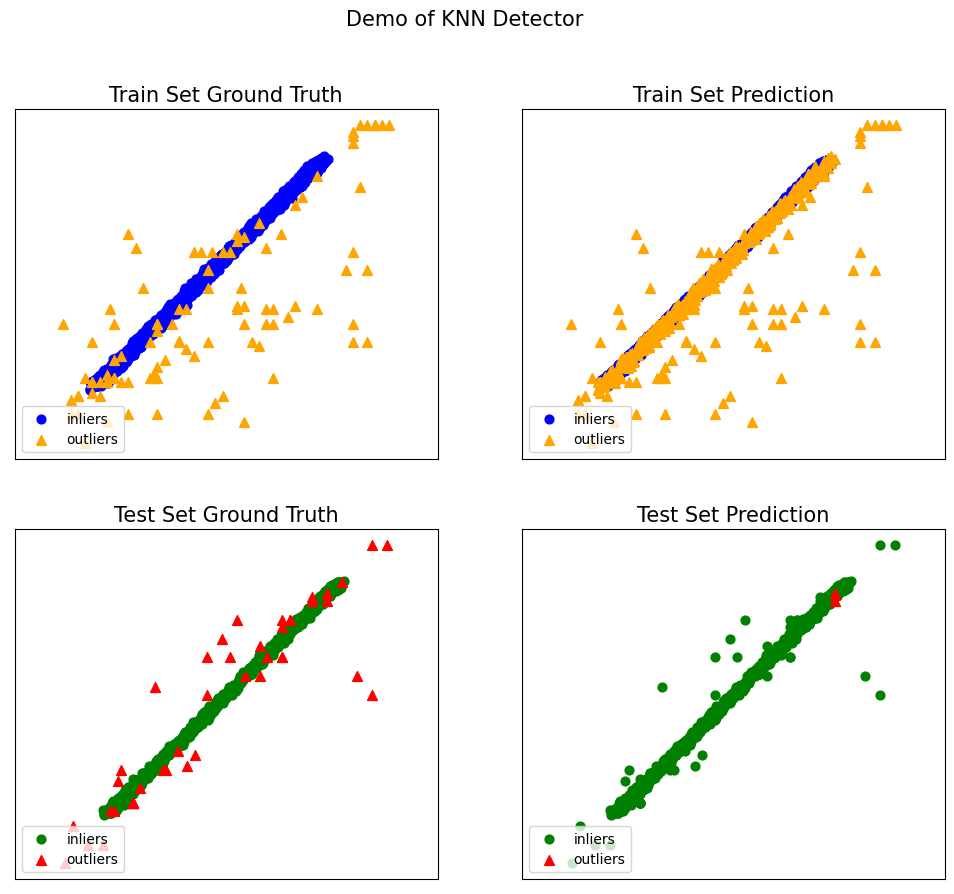

In [15]:
visualize(classifier_name, X_train[:,:-1], y_train, X_test[:,:-1], y_test, train_prediction, new_result, show_figure=True, save_figure=False)

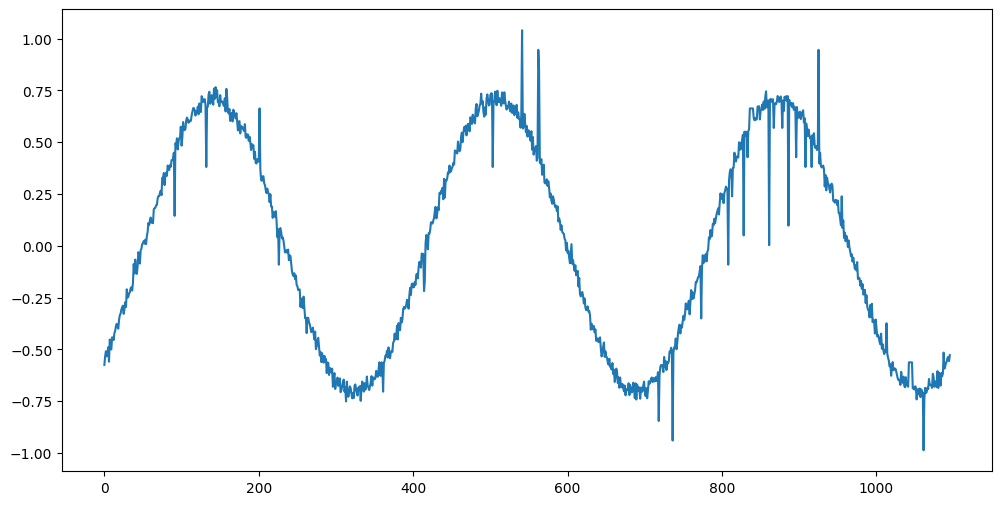

In [16]:
plt.figure(figsize=(12,6))
plt.plot(X_test[:,0])

In [18]:
np.where(y_test==1)

(array([  91,  132,  158,  201,  226,  262,  296,  313,  361,  414,  415,
         503,  541,  562,  563,  661,  662,  718,  736,  773,  808,  813,
         828,  833,  836,  837,  838,  839,  840,  861,  867,  878,  886,
         896,  908,  916,  925,  933,  955,  994, 1013, 1042, 1043, 1044,
        1045, 1046, 1061, 1087], dtype=int64),)

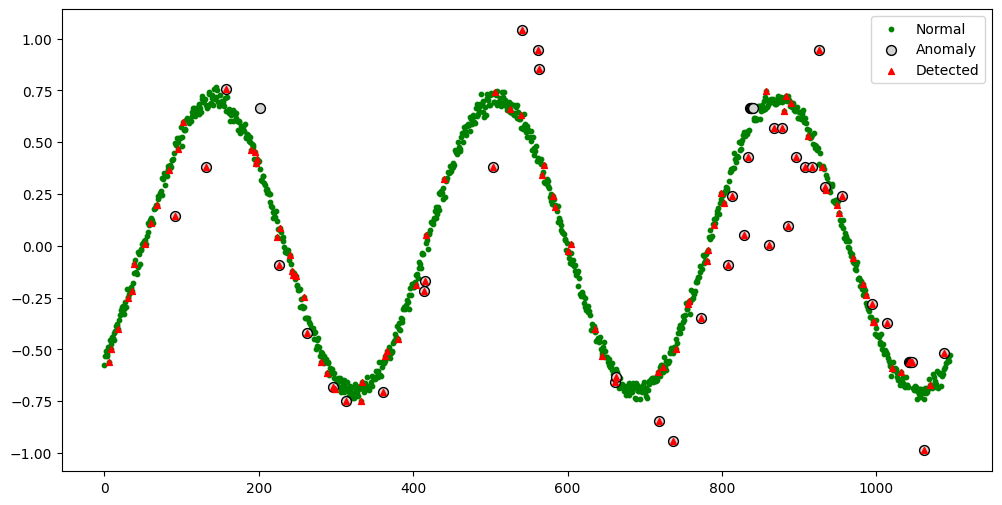

In [19]:
plt.figure(figsize=(12,6))
plt.scatter(np.where(y_test==0),X_test[:,0][y_test==0], label="Normal", s= 10, c="g")
plt.scatter(np.where(y_test==1), X_test[:,0][y_test==1], label="Anomaly", s=50, c= "lightgray", edgecolor='black', linewidth=1,)
plt.scatter(np.where(test_prediction==1), X_test[:,0][test_prediction==1], label="Detected", s=18, marker="^", c="r")
plt.legend()
plt.show()

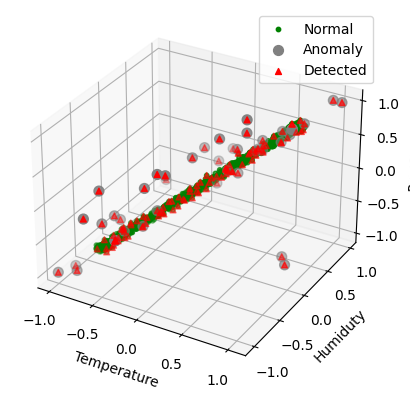

In [20]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1], X_test[y_test==0][:,2], marker="o",s= 10, c="g", label= "Normal")
ax.legend()
ax.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], X_test[y_test==1][:,2], marker="o",s= 50, c="gray",label=  "Anomaly")
ax.legend()
ax.scatter(X_test[test_prediction==1][:,0],X_test[test_prediction==1][:,1],X_test[test_prediction==1][:,2], label="Detected", s=18, marker="^", c="r")
ax.legend()
ax.set_xlabel('Temperature')
ax.set_ylabel('Humiduty')
ax.set_zlabel('Pressure')
plt.show()

In [21]:
tp = []
for gd, p in zip(y_test, test_prediction):
    if gd==1 and p == 1:
        tp.append(1)
    else:
        tp.append(0)
tp = np.array(tp)

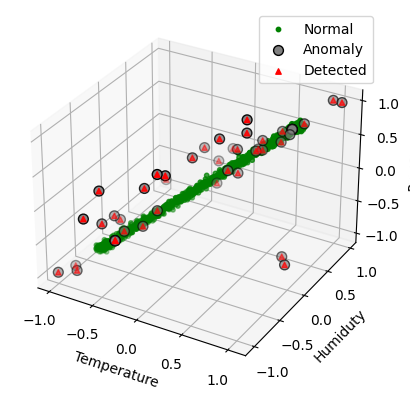

In [22]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_test[y_test==0][:,0], X_test[y_test==0][:,1], X_test[y_test==0][:,2], marker="o",s= 10, c="g", label= "Normal")
ax.legend()
ax.scatter(X_test[y_test==1][:,0], X_test[y_test==1][:,1], X_test[y_test==1][:,2], marker="o",s= 50, c="gray",label=  "Anomaly", edgecolor='black', linewidth=1)
ax.legend()
ax.scatter(X_test[tp==1][:,0],X_test[tp==1][:,1],X_test[tp==1][:,2], label="Detected", s=15, marker="^", c="r")
ax.legend()
ax.set_xlabel('Temperature')
ax.set_ylabel('Humiduty')
ax.set_zlabel('Pressure')
plt.savefig("3D_visual.pdf", format= "pdf")